## TASK :  Download the adult_WS4 dataset. Apply K-Means and Hierarchical clustering to three optional columns in the dataset. Find the optimum number of clusters for both clustering methods.

   age workclass  fnlwgt     education  education-num  ... capital-gain  \
0   29   Private  216481       Masters             14  ...            0   
1   36   Private  280570  Some-college             10  ...            0   
2   25         ?  100903     Bachelors             13  ...            0   
3   47   Private  145636     Assoc-voc             11  ...            0   
4   33   Private  119422       HS-grad              9  ...            0   

  capital-loss hours-per-week native-country income  
0            0             40  United-States   >50K  
1            0             45  United-States  <=50K  
2            0             25  United-States  <=50K  
3            0             48  United-States   >50K  
4            0             40  United-States  <=50K  

[5 rows x 15 columns]


    age workclass  fnlwgt     education  education-num  ... native-country  \
0   29   Private  216481       Masters             14  ...  United-States   
1   36   Private  280570  Some-college       

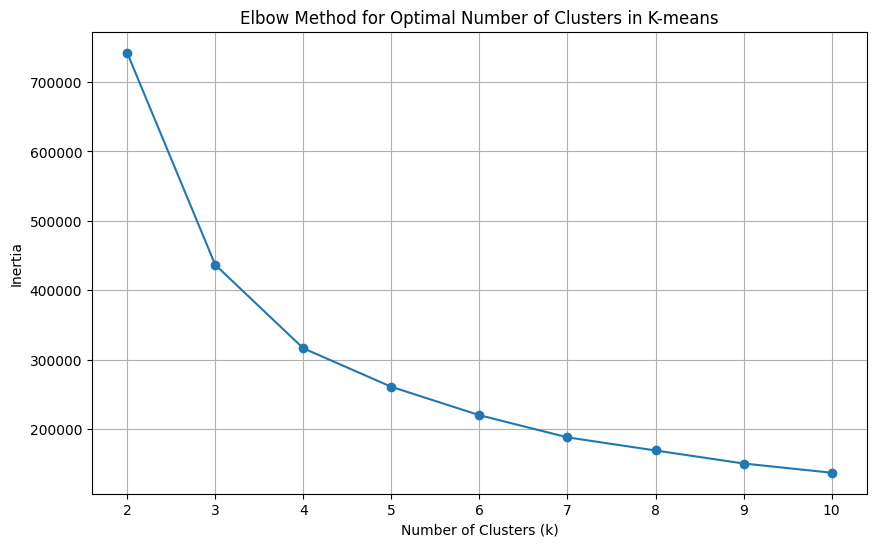



 The cluster Centers:
[[47.75473934 10.4328594   0.70655608]
 [23.44684441 10.21498481  0.58353021]
 [35.37339994 10.49484858  0.69747112]
 [63.24500768  9.78264209  0.70353303]]


 The count of data points in each cluster:
2    3203
1    2963
0    2532
3    1302
Name: cluster_label, dtype: int64

Cluster 0:
               age  education_encoded  sex_encoded
count  2532.000000        2532.000000  2532.000000
mean     47.754739          10.432859     0.706556
std       3.868681           3.470004     0.455430
min      42.000000           0.000000     0.000000
25%      44.000000           9.000000     0.000000
50%      47.000000          11.000000     1.000000
75%      51.000000          12.000000     1.000000
max      55.000000          15.000000     1.000000

Cluster 1:
               age  education_encoded  sex_encoded
count  2963.000000        2963.000000  2963.000000
mean     23.446844          10.214985     0.583530
std       3.561762           4.440242     0.493057
min      17.0

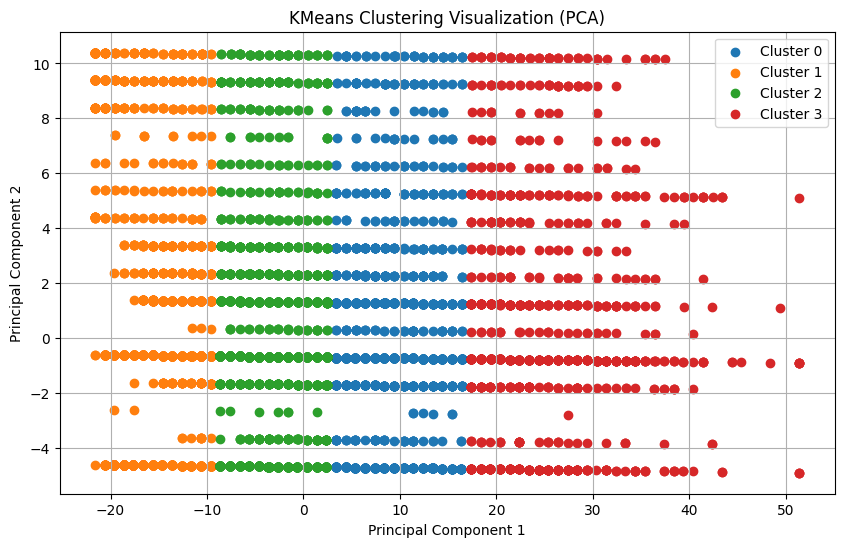

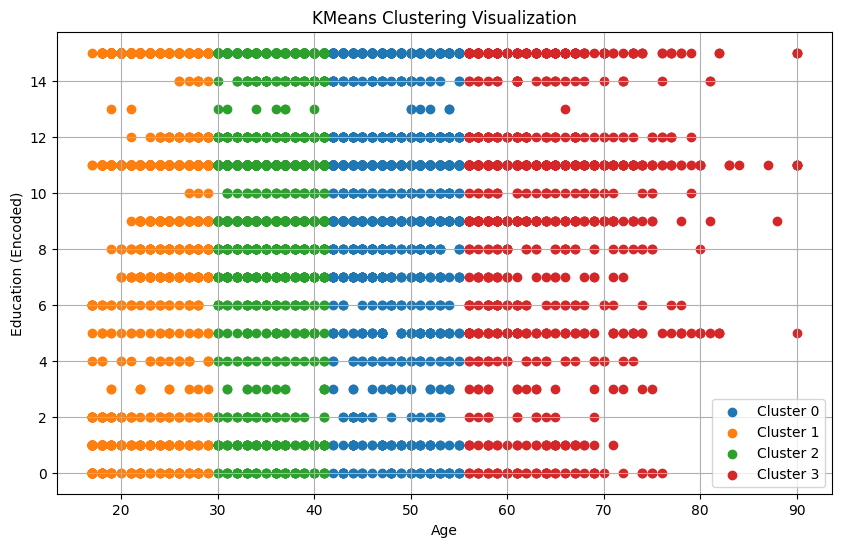

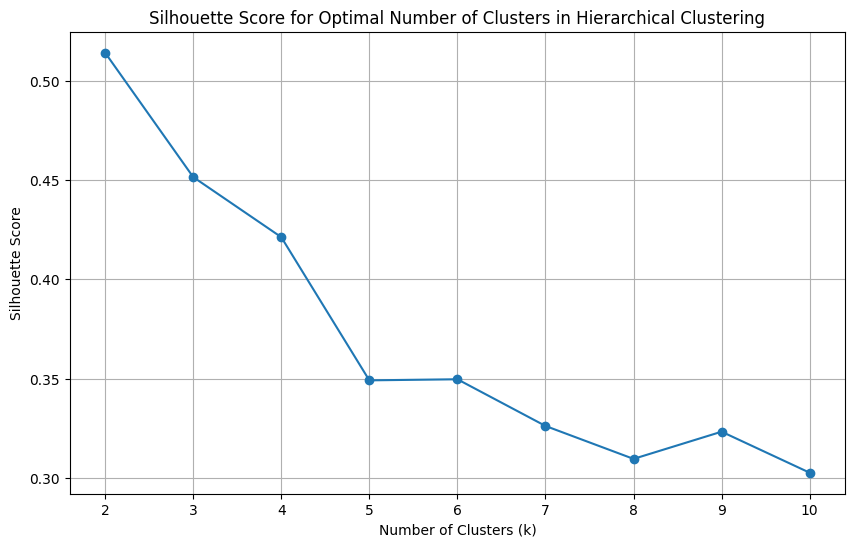

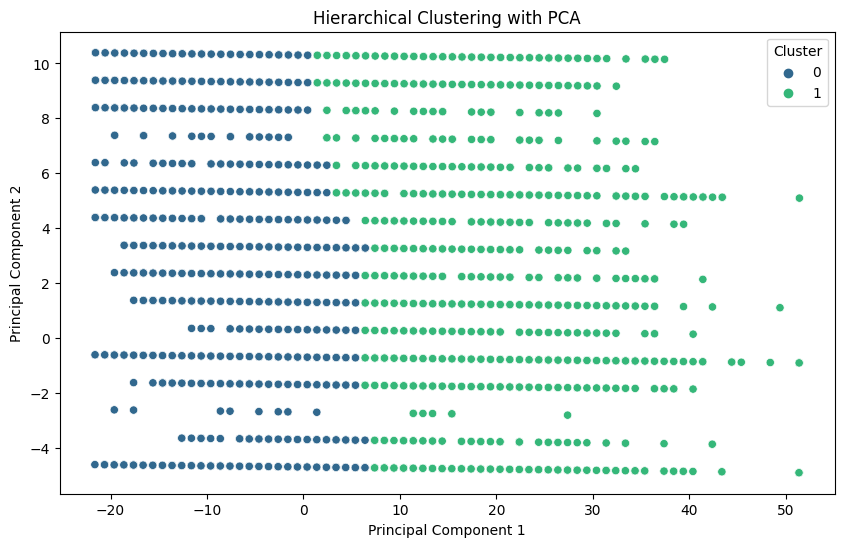

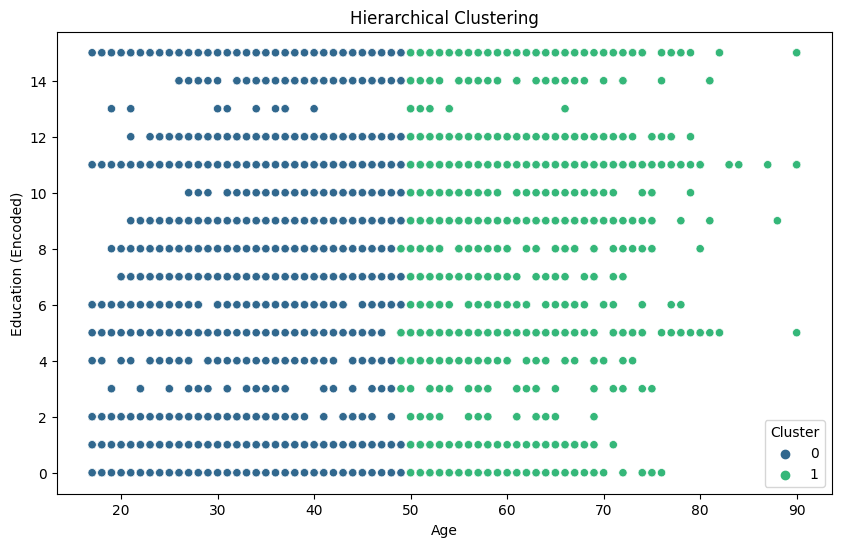

In [4]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.metrics import silhouette_score

# Loading the dataset
df = pd.read_csv('C:/Users/muhab/Downloads/adult_WS4.csv')

# Exploring the data
print(df.head())

# Preprocessing data
standard_scaler_instance = StandardScaler() # Initializing standard scaler
np_array = df['age'].values.reshape(-1,1) # Reshaping to a 2D array containing all rows and one column 
df['age_scaled'] = standard_scaler_instance.fit_transform(np_array) # Fitting the standard scaler to the 'age_scaled' column data and transforming

label_encoder_instance = LabelEncoder() # Initializing label encoder
df['education_encoded'] = label_encoder_instance.fit_transform(df['education']) # Fitting the label encoder to the 'education_encoded' column data and transforming
df['sex_encoded'] = label_encoder_instance.fit_transform(df['sex']) # Fitting the label encoder to the 'sex_encoded' column data and transforming

# Setting the display settings
pd.set_option('display.max_rows', 10) # Display maximum of five rows
pd.set_option('display.max_columns', 10) # Display maximum of five columns 
print('\n\n', df.head(5)) # Printing the new dataset with the scaled and encoded columns appended

# Selecting three optional columns
optional_columns = ['age', 'education_encoded', 'sex_encoded']
X = df[optional_columns]

# Determining the optimal number of clusters for k-means using the Elbow Method
k_values = range(2, 11) # Range of clusters to test

# List to store the inertia (within-cluster sum of squares) for each k
inertia_values = []

# Fit KMeans for each k and store the inertia
for k in k_values: # Looping the k values wihin the allocated range
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Visualizing the graph for the optimal k within the range by plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters in K-means')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Defining the number of clusters
n_clusters = 4 

# Initializing KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Fitting KMeans to the data
kmeans.fit(X)

# Getting cluster labels
cluster_labels = kmeans.labels_

# Adding cluster labels to the DataFrame
df['cluster_label'] = cluster_labels

# Printing the cluster centers
print('\n\n', "The cluster Centers:")
print(kmeans.cluster_centers_)

# Printing the counts of data points in each cluster
print('\n\n', "The count of data points in each cluster:")
print(df['cluster_label'].value_counts())

# Exploring the characteristics of each cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    print(df[df['cluster_label'] == cluster][optional_columns].describe())

# Applying PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plotting each cluster
for cluster in range(n_clusters):
    plt.scatter(X_pca[df['cluster_label'] == cluster, 0], 
                X_pca[df['cluster_label'] == cluster, 1], 
                label=f'Cluster {cluster}')

plt.title('KMeans Clustering Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
    
# Plotting the clusters without dimensionality reduction
plt.figure(figsize=(10, 6))

# Plot each cluster
for cluster in range(n_clusters):
    cluster_data = X[df['cluster_label'] == cluster]
    plt.scatter(cluster_data['age'], cluster_data['education_encoded'], label=f'Cluster {cluster}')

plt.title('KMeans Clustering Visualization')
plt.xlabel('Age')
plt.ylabel('Education (Encoded)')
plt.legend()
plt.grid(True)
plt.show()



# Determining the optimal number of clusters for Hierarchical clustering using the silhouette Method
k_values = range(2, 11) # Range of clusters to test

# List to store silhouette scores for each k
silhouette_scores = []

# Fitting AgglomerativeClustering for each k and store the silhouette score
for k in k_values:
    clustering = AgglomerativeClustering(n_clusters=k)
    labels = clustering.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Visualizing the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for Optimal Number of Clusters in Hierarchical Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Applying hierarchical clustering to the reduced data
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X_pca)

# Visualize the clusters with dimentions reduced
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Applying hierarchical clustering without reducing the dimentionality
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

# Visualize the clusters without reducing the dimentionality
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=cluster.labels_, palette='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Age')
plt.ylabel('Education (Encoded)')
plt.legend(title='Cluster')
plt.show()
    


## Task : Apply the PCA method to the dataset and extract the first two principal components (n_components=2). Plot the scatter plot of the dataset's first two components for the two classes of the income column.

   age workclass  ...  native-country income
0   29   Private  ...   United-States   >50K
1   36   Private  ...   United-States  <=50K
2   25         ?  ...   United-States  <=50K
3   47   Private  ...   United-States   >50K
4   33   Private  ...   United-States  <=50K

[5 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   workclass       9825 non-null   object
 2   fnlwgt          10000 non-null  int64 
 3   education       10000 non-null  object
 4   education-num   10000 non-null  int64 
 5   marital-status  10000 non-null  object
 6   occupation      9825 non-null   object
 7   relationship    10000 non-null  object
 8   race            10000 non-null  object
 9   sex             10000 non-null  object
 10  capital-gain    10000 non-null  int64 
 11  capital-loss    10000 

<Figure size 640x480 with 0 Axes>

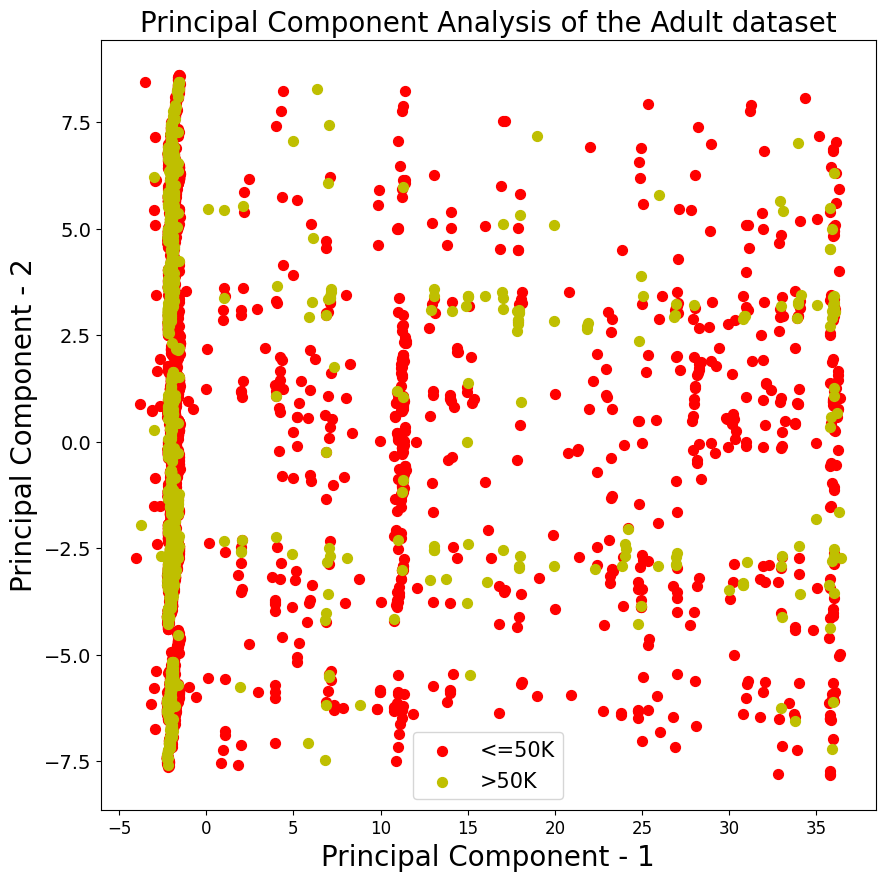

In [78]:
############# WRITE YOUR CODE IN THIS CELL (IF APPLICABLE)####################
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Loading the dataset
df = pd.read_csv('C:/Users/muhab/Downloads/adult_WS4.csv')

# Exploring the data
pd.set_option('display.max_rows', 5) # Displaying five maximum rows
pd.set_option('display.max_columns', 5) # Displaying five maximum columns
print(df.head(5)) # Printing the dataset
df.info() # Brief overview of the dataset

# Preprocessing the dataset
df.dropna(inplace=True)  # Deleting all rows containing null values
df.reset_index(drop=True, inplace=True)  # Re-indexing the resulting dataset

# Separating the input (features) into numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64']).columns # Selecting numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns # Selecting categorical columns
categorical_cols = categorical_cols.drop('income') # Droping the target column from the selected categorical columns

# Preprocessing numerical columns
scaler = StandardScaler() # Initializing the standard scaler
df[numerical_cols] = scaler.fit_transform(df[numerical_cols]) #fitting and transforming the numerical columns to scale

# Preprocessing categorical columns
label_encoder = LabelEncoder() # Initializing the label encoder
df[categorical_cols] = df[categorical_cols].apply(label_encoder.fit_transform) # Encoding the categorical columns

X = df.drop('income', axis=1) # Dropping the target column from the new dataset wherein other columns have been normalized and encoded
y = df['income'] # Selecting the 'income' column as the target column

# Encoding the target variable
y = label_encoder.fit_transform(y) # Encoding the target column

# Applying the PCA to reduce dimentionality to two components
a = PCA(n_components=2) # Initializing the PCA with the first two components
X_pca = pca.fit_transform(X) # Fitting and transforming the input columns to PCA
X_df = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2']) # Creating a pandas dataframe for the two components

print(X_df) # Printing the dataset

# Visualizing the PCA, plotting the two comoponents against each other
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of the Adult dataset",fontsize=20)
targets_income = ['<=50K', '>50K']
colors = ['r', 'y']
for target, color in zip(targets_income,colors):
    indicesToKeep = df['income'] == target
    plt.scatter(X_df.loc[indicesToKeep, 'principal component 1']
               , X_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets_income,prop={'size': 15})

